### Nous prévoyons de charger une base de données de patients suivis pour une tuberculose dans un centre de suivi.
Le modèle nous permettra de déterminer si le patient que l'on vient de recevoir va survivre au traitement ou pas.
- La prédiction Yes signifie qu'il va déceder ;
- La prédiction No signifie qu'il va survivre.

In [2021]:
import pandas as pd

In [2023]:
data=pd.read_excel("DATASET_TB.xlsx")

In [2025]:
data.head()

,Region,Departement,Residence,Age,Sexe,Source_orientation,Annee,Mois,Site,Rx,...,VIH,Glycemie,Valeur_glycemie,Comorbidite,Type_comorbidite,Unite_traitement,Delai_traitement,Regime_traitement,TDO,Resultat
0,1,22.0,1,30,2,1.0,1,1,1,2.0,...,2.0,1.0,0.72,2.0,NaN,Gadapara,1.0,1,1,1
1,1,22.0,2,30,1,1.0,1,1,1,2.0,...,2.0,1.0,0.91,2.0,NaN,Csk,1.0,1,1,1
2,1,22.0,1,25,1,1.0,1,1,1,2.0,...,2.0,1.0,1.31,2.0,NaN,Csk,1.0,1,1,1
3,1,22.0,2,9,1,1.0,1,1,2,NaN,...,NaN,2.0,NaN,1.0,1.0,Csk,0.0,1,1,2
4,1,22.0,2,23,2,1.0,1,1,1,2.0,...,1.0,1.0,1.30,1.0,1.0,Csk,1.0,1,1,1


In [2027]:
data.shape

(920, 26)

## CRISP DM
- BUSINESS UNDERSTANDING

In [2030]:
# JE VOUDRAIS PREDIRE L'EVOLUTION DES PATIENTS TUBERCULEUX SUIVIS DANS LE DISTRICT.

- DATA UNDERSTANDING

In [2033]:
data1 = data.drop(['Region','Departement','Source_orientation','Annee','Mois','Glycemie','Comorbidite','Unite_traitement','Depistage_vih','Type_comorbidite','Site_EP'],axis=1)

In [2035]:
data1.head()

,Residence,Age,Sexe,Site,Rx,Type,Methode_diagnostique,Degre_BAAR,Resistance_Xpert,VIH,Valeur_glycemie,Delai_traitement,Regime_traitement,TDO,Resultat
0,1,30,2,1,2.0,1,1,4.0,NaN,2.0,0.72,1.0,1,1,1
1,2,30,1,1,2.0,1,1,2.0,NaN,2.0,0.91,1.0,1,1,1
2,1,25,1,1,2.0,1,1,3.0,NaN,2.0,1.31,1.0,1,1,1
3,2,9,1,2,NaN,1,3,NaN,NaN,NaN,NaN,0.0,1,1,2
4,2,23,2,1,2.0,1,1,2.0,NaN,1.0,1.30,1.0,1,1,1


In [2037]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Residence             920 non-null    int64  
 1   Age                   920 non-null    int64  
 2   Sexe                  920 non-null    int64  
 3   Site                  920 non-null    int64  
 4   Rx                    849 non-null    float64
 5   Type                  920 non-null    int64  
 6   Methode_diagnostique  920 non-null    int64  
 7   Degre_BAAR            432 non-null    float64
 8   Resistance_Xpert      340 non-null    float64
 9   VIH                   869 non-null    float64
 10  Valeur_glycemie       815 non-null    float64
 11  Delai_traitement      914 non-null    float64
 12  Regime_traitement     920 non-null    int64  
 13  TDO                   920 non-null    int64  
 14  Resultat              920 non-null    int64  
dtypes: float64(6), int64(9)

In [2039]:
data1.isnull().sum()

Residence                 0
Age                       0
Sexe                      0
Site                      0
Rx                       71
Type                      0
Methode_diagnostique      0
Degre_BAAR              488
Resistance_Xpert        580
VIH                      51
Valeur_glycemie         105
Delai_traitement          6
Regime_traitement         0
TDO                       0
Resultat                  0
dtype: int64

In [2041]:
data1["Valeur_glycemie"].isna().sum()/data1.shape[0] 

0.11413043478260869

In [2043]:
data1["Valeur_glycemie"].fillna(data1["Valeur_glycemie"].mean(), inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_33764\2361101427.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data1["Valeur_glycemie"].fillna(data1["Valeur_glycemie"].mean(), inplace=True)


In [2045]:
data1["Valeur_glycemie"].isna().sum()/data1.shape[0] 

0.0

In [2047]:
data1["Valeur_glycemie"].isnull().sum()

0

In [2049]:
data1["VIH"].fillna('2', inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_33764\1220110407.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data1["VIH"].fillna('2', inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_33764\1220110407.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data1["VIH"].fillna('2', inplace=True)


In [2051]:
data1["VIH"].isnull().sum()

0

In [2053]:
data1["Rx"].fillna('2', inplace=True)
data1["Degre_BAAR"].fillna(data1["Degre_BAAR"].mean(), inplace=True)
data1["Delai_traitement"].fillna(data1["Delai_traitement"].mean(), inplace=True)
data1["Resistance_Xpert"].fillna('2', inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_33764\1594665462.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data1["Rx"].fillna('2', inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_33764\1594665462.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data1["Rx"].fillna('2', inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_33764\1594665462.p

In [2055]:
data1.isnull().sum()

Residence               0
Age                     0
Sexe                    0
Site                    0
Rx                      0
Type                    0
Methode_diagnostique    0
Degre_BAAR              0
Resistance_Xpert        0
VIH                     0
Valeur_glycemie         0
Delai_traitement        0
Regime_traitement       0
TDO                     0
Resultat                0
dtype: int64

In [2057]:
data1.shape

(920, 15)

In [2059]:
data1.describe()

,Residence,Age,Sexe,Site,Type,Methode_diagnostique,Degre_BAAR,Valeur_glycemie,Delai_traitement,Regime_traitement,TDO,Resultat
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,1.479348,38.028261,1.376087,1.078261,1.163043,1.691304,2.759259,1.062110,2.150985,1.005435,1.001087,2.193478
std,0.499845,17.276830,0.484666,0.268728,0.661011,0.731932,0.631907,0.419874,4.754834,0.073560,0.032969,1.600313
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000,0.000000,1.000000,1.000000,1.000000
25%,1.000000,25.000000,1.000000,1.000000,1.000000,1.000000,2.759259,0.840000,0.000000,1.000000,1.000000,1.000000
50%,1.000000,35.500000,1.000000,1.000000,1.000000,2.000000,2.759259,0.990000,1.000000,1.000000,1.000000,1.000000
75%,2.000000,50.000000,2.000000,1.000000,1.000000,2.000000,3.000000,1.100000,2.000000,1.000000,1.000000,4.000000
max,2.000000,91.000000,2.000000,2.000000,6.000000,3.000000,4.000000,4.350000,80.000000,2.000000,2.000000,6.000000


In [2061]:
import seaborn as sns
sns.set_style('whitegrid') 
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker 
import plotly.express as px 
import plotly.graph_objects as go 
import plotly.io as pio 
import plotly.colors as colors 
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    roc_auc_score, classification_report, confusion_matrix
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier

In [2063]:
typeResidence = data1['Residence'].value_counts(normalize=True) * 100 
print("Percentage distribution of 'Location':\n", typeResidence)

Percentage distribution of 'Location':
 Residence
1    52.065217
2    47.934783
Name: proportion, dtype: float64


In [2065]:
data1['Residence'].value_counts()

Residence
1    479
2    441
Name: count, dtype: int64

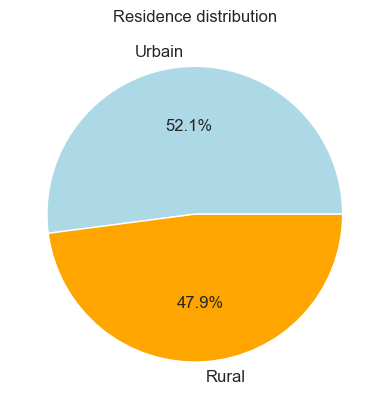

In [2067]:
typeResidence.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'orange'], labels=['Urbain','Rural'], fontsize=12)
plt.title('Residence distribution')
plt.ylabel('')
plt.show()

In [2068]:
data1['Resultat'].value_counts()

Resultat
1    500
2    159
5    146
4     83
3     18
6     14
Name: count, dtype: int64

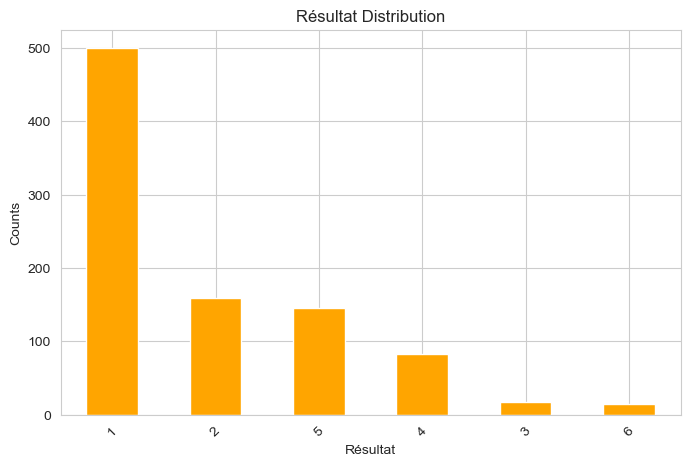

In [2071]:
plt.figure(figsize=(8, 5)) 
data1['Resultat'].value_counts().plot(kind='bar', color='orange') 
plt.title('Résultat Distribution') 
plt.xlabel('Résultat') 
plt.ylabel('Counts') 
plt.xticks(rotation=45) 
plt.show()

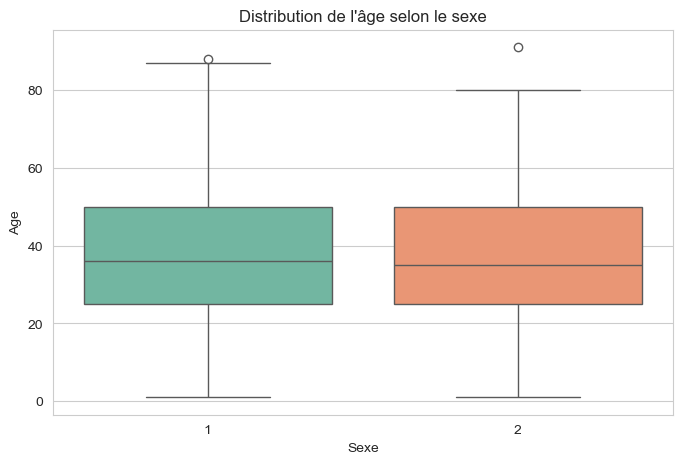

In [2073]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Sexe', y='Age', data=data, hue='Sexe', palette="Set2", legend=False)
plt.title("Distribution de l'âge selon le sexe")
plt.xlabel("Sexe")
plt.ylabel("Age")
plt.show()

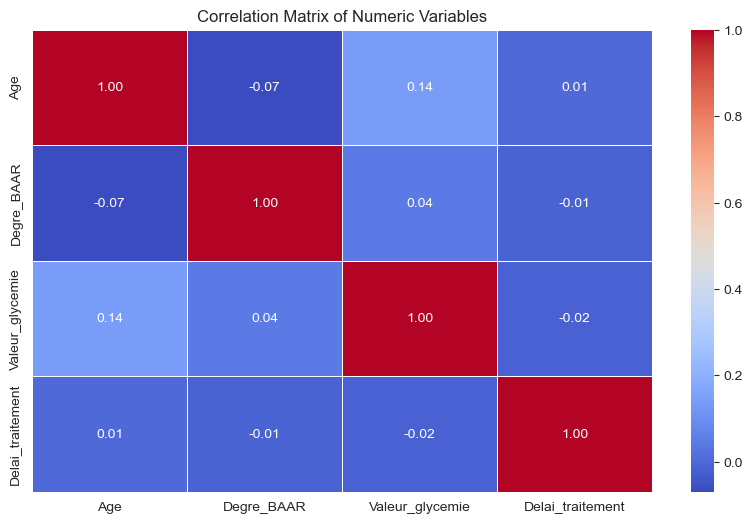

In [2075]:
# Select only numeric columns 
numerical_data = data[['Age', 'Degre_BAAR', 'Valeur_glycemie', 'Delai_traitement']] 
# Calculate the correlation matrix
correlation_matrix = numerical_data.corr() 
# Display the correlation matrix as a heatmap 
plt.figure(figsize=(10, 6)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5) 
plt.title('Correlation Matrix of Numeric Variables') 
plt.show()

- Data preparation

In [2078]:
data1.isnull().sum()

Residence               0
Age                     0
Sexe                    0
Site                    0
Rx                      0
Type                    0
Methode_diagnostique    0
Degre_BAAR              0
Resistance_Xpert        0
VIH                     0
Valeur_glycemie         0
Delai_traitement        0
Regime_traitement       0
TDO                     0
Resultat                0
dtype: int64

In [2080]:
data1.shape

(920, 15)

In [2084]:
# Convert numeric columns to appropriate types
numeric_columns = ['Age', 'Degre_BAAR', 'Valeur_glycemie', 'Delai_traitement']
data1[numeric_columns] = data1[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Convert categorical columns to 'category' type
categorical_columns = [
    'Sexe', 'Site', 'Rx', 'Type', 'Methode_diagnostique', 'Resistance_Xpert', 'Regime_traitement', 'TDO', 'VIH', 'Resultat'
]
data1[categorical_columns] = data1[categorical_columns].astype('category')

# Display updated DataFrame info
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Residence             920 non-null    int64   
 1   Age                   920 non-null    int64   
 2   Sexe                  920 non-null    category
 3   Site                  920 non-null    category
 4   Rx                    920 non-null    category
 5   Type                  920 non-null    category
 6   Methode_diagnostique  920 non-null    category
 7   Degre_BAAR            920 non-null    float64 
 8   Resistance_Xpert      920 non-null    category
 9   VIH                   920 non-null    category
 10  Valeur_glycemie       920 non-null    float64 
 11  Delai_traitement      920 non-null    float64 
 12  Regime_traitement     920 non-null    category
 13  TDO                   920 non-null    category
 14  Resultat              920 non-null    category
dtypes: cat

In [2086]:
data1.dtypes

Residence                  int64
Age                        int64
Sexe                    category
Site                    category
Rx                      category
Type                    category
Methode_diagnostique    category
Degre_BAAR               float64
Resistance_Xpert        category
VIH                     category
Valeur_glycemie          float64
Delai_traitement         float64
Regime_traitement       category
TDO                     category
Resultat                category
dtype: object

In [1735]:
data1.head()

,Residence,Age,Sexe,Site,Rx,Type,Methode_diagnostique,Degre_BAAR,Resistance_Xpert,VIH,Valeur_glycemie,Delai_traitement,Regime_traitement,TDO,Resultat
0,1,30,2,1,2.0,1,1,4.000000,2,2.0,0.72000,1.0,1,1,1
1,2,30,1,1,2.0,1,1,2.000000,2,2.0,0.91000,1.0,1,1,1
2,1,25,1,1,2.0,1,1,3.000000,2,2.0,1.31000,1.0,1,1,1
3,2,9,1,2,2,1,3,2.759259,2,2,1.06211,0.0,1,1,2
4,2,23,2,1,2.0,1,1,2.000000,2,1.0,1.30000,1.0,1,1,1


In [2214]:
data1["Rx"] = data1["Rx"].astype(str)

In [2216]:
data1["VIH"] = data1["VIH"].astype(str)

In [2218]:
data1["Resistance_Xpert"] = data1["Resistance_Xpert"].astype(str)

In [2220]:
data1["Residence"] = data1["Residence"].astype(int)

In [2221]:
data1["Age"] = data1["Age"].astype(int)

In [2223]:
data1["Sexe"] = data1["Sexe"].astype(int)

In [2225]:
data1["Site"] = data1["Site"].astype(int)

In [2226]:
data1["Type"] = data1["Type"].astype(int)

In [2228]:
data1["Methode_diagnostique"] = data1["Methode_diagnostique"].astype(int)

In [2230]:
data1["Regime_traitement"] = data1["Regime_traitement"].astype(int)

In [2232]:
data1["TDO"] = data1["TDO"].astype(int)

In [2234]:
data1["Resultat"] = data1["Resultat"].astype(int)

In [2236]:
data1["Delai_traitement"] = data1["Delai_traitement"].astype(float)

In [2238]:
data1["Valeur_glycemie"] = data1["Valeur_glycemie"].astype(float)

In [2240]:
data1["Degre_BAAR"] = data1["Degre_BAAR"].astype(float)

In [2243]:
data1.dtypes

Residence                 int32
Age                       int32
Sexe                      int32
Site                      int32
Rx                       object
Type                      int32
Methode_diagnostique      int32
Degre_BAAR              float64
Resistance_Xpert         object
VIH                      object
Valeur_glycemie         float64
Delai_traitement        float64
Regime_traitement         int32
TDO                       int32
Resultat                  int32
dtype: object

In [2246]:
data1.dtypes

Residence                 int32
Age                       int32
Sexe                      int32
Site                      int32
Rx                       object
Type                      int32
Methode_diagnostique      int32
Degre_BAAR              float64
Resistance_Xpert         object
VIH                      object
Valeur_glycemie         float64
Delai_traitement        float64
Regime_traitement         int32
TDO                       int32
Resultat                  int32
dtype: object

In [2248]:
X=data1.drop("Resultat", axis=1)
y=data1["Resultat"]

In [2250]:
y

0      1
1      1
2      1
3      2
4      1
      ..
915    5
916    1
917    1
918    2
919    2
Name: Resultat, Length: 920, dtype: int32

In [2264]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [2266]:
X_train.shape

(736, 14)

In [2268]:
y_train.shape

(736,)

In [2270]:
categorical_columns = [
    'Sexe', 'Site', 'Rx', 'Type', 'Methode_diagnostique', 'Resistance_Xpert', 'Regime_traitement', 'TDO', 'VIH', 'Residence'
]

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train[categorical_columns]), columns=encoder.get_feature_names_out(categorical_columns), index=X_train.index)
X_test_encoded = pd.DataFrame(encoder.transform(X_test[categorical_columns]), columns=encoder.get_feature_names_out(categorical_columns), index=X_test.index)

In [2271]:
X_train = pd.concat([X_train.drop(categorical_columns, axis=1), X_train_encoded], axis=1)

In [2274]:
X_test = pd.concat([X_test.drop(categorical_columns, axis=1), X_test_encoded], axis=1)

In [2276]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable
y_train_encoded = label_encoder.fit_transform(y_train)  # 'no' -> 0, 'yes' -> 1
y_test_encoded = label_encoder.transform(y_test)  # Ensure consistency for the test set

In [2278]:
scaler = StandardScaler()
numeric_columns = ['Age', 'Degre_BAAR', 'Valeur_glycemie', 'Delai_traitement']
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

In [2279]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

- Modeling

In [2283]:
rfc=RandomForestClassifier(class_weight='balanced', random_state=42)

In [2284]:
rfc.fit(X_train_smote, y_train_smote)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [2285]:
y_pred = rfc.predict(X_test)

In [2287]:
y_pred

array([1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 5, 4, 1, 4, 2, 2, 5, 2, 5,
       2, 1, 5, 1, 1, 1, 5, 1, 1, 4, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 5,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 2, 2, 2, 1, 4,
       1, 4, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 3, 4, 1, 1, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 4, 2, 1, 1, 2, 5, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1,
       4, 1, 2, 1, 2, 4, 2, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1,
       2, 6, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 6, 5, 1, 1, 2, 1, 1, 2, 1, 1,
       1, 1, 1, 3, 1, 1, 1, 1, 5, 1, 2, 1, 1, 5, 1, 2, 1, 1, 3, 1, 5, 1,
       1, 4, 1, 1, 2, 1, 2, 1])

In [2290]:
accuracy = accuracy_score(y_test, y_pred)

In [2291]:
accuracy

0.5760869565217391

In [2293]:
cm = confusion_matrix(y_test, y_pred)

In [2294]:
cm

array([[83,  6,  1,  6,  7,  2],
       [ 7, 17,  0,  1,  3,  0],
       [ 2,  0,  0,  0,  0,  0],
       [15,  3,  1,  4,  1,  0],
       [11,  7,  1,  1,  2,  0],
       [ 1,  1,  1,  0,  0,  0]], dtype=int64)

In [2296]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

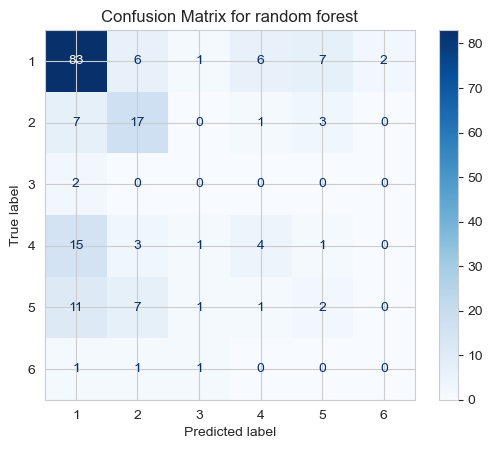

In [2298]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['1', '2', '3', '4', '5', '6'])
disp.plot(cmap='Blues')
plt.title(f"Confusion Matrix for random forest")
plt.show()

In [2302]:
lr=LogisticRegression(class_weight='balanced', random_state=42)

In [2305]:
lr.fit(X_train_smote, y_train_smote)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', random_state=42)

In [2307]:
y_pred = lr.predict(X_test)

In [2309]:
y_pred

array([1, 4, 6, 3, 5, 1, 3, 1, 1, 1, 3, 2, 2, 4, 1, 4, 5, 2, 5, 3, 2, 2,
       2, 1, 4, 1, 3, 4, 1, 1, 5, 6, 2, 1, 6, 4, 6, 2, 3, 1, 3, 4, 6, 4,
       3, 3, 3, 5, 6, 3, 4, 1, 5, 1, 4, 4, 1, 4, 5, 6, 4, 5, 2, 2, 3, 2,
       3, 4, 5, 6, 2, 3, 3, 4, 4, 1, 1, 1, 6, 3, 2, 6, 5, 3, 4, 1, 5, 4,
       3, 3, 4, 1, 1, 4, 3, 5, 4, 2, 2, 1, 3, 4, 3, 2, 4, 2, 4, 6, 1, 5,
       6, 5, 2, 1, 5, 6, 2, 4, 5, 4, 1, 5, 1, 6, 4, 1, 1, 1, 2, 6, 6, 1,
       1, 6, 1, 3, 4, 6, 6, 3, 5, 5, 1, 4, 3, 3, 1, 6, 2, 1, 1, 2, 1, 1,
       4, 3, 3, 3, 5, 1, 1, 1, 3, 1, 2, 1, 1, 5, 1, 2, 5, 6, 6, 6, 5, 1,
       3, 4, 3, 4, 2, 4, 2, 6])

In [2311]:
accuracy = accuracy_score(y_test, y_pred)

In [2313]:
accuracy

0.3695652173913043

In [2314]:
svc=SVC(class_weight='balanced', probability=True, random_state=42)

In [2317]:
svc.fit(X_train_smote,y_train_smote)

SVC(class_weight='balanced', probability=True, random_state=42)

In [2318]:
y_pred = svc.predict(X_test)

In [2319]:
accuracy = accuracy_score(y_test, y_pred)

In [2320]:
accuracy

0.46195652173913043

In [2321]:
import joblib
# Save the trained Gradient Boosting model
joblib.dump(rfc, 'random_forest_model.pkl')
joblib.dump(encoder, "encoder.pkl")
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [2322]:
!pip install gradio

In [2333]:
import gradio as gr
import joblib
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
# Charger le modèle, l'encodeur et le scaler
model = joblib.load('random_forest_model.pkl')
encoder = joblib.load("encoder.pkl")
scaler = joblib.load("scaler.pkl")
# Définir les colonnes catégoriques et numériques
categorical_columns = [
    'Sexe', 'Site', 'Rx', 'Type', 'Methode_diagnostique', 'Resistance_Xpert', 'Regime_traitement', 'TDO', 'VIH', 'Residence'
]
numeric_columns = ['Age', 'Degre_BAAR', 'Valeur_glycemie', 'Delai_traitement']
# Fonction de prétraitement des données d'entrée
def preprocess_input(data):
    try:
        # Convertir les données d'entrée en DataFrame
        input_df = pd.DataFrame([data])
        # Normaliser les colonnes numériques
        input_df[numeric_columns] = scaler.transform(input_df[numeric_columns])
        # Encoder les colonnes catégoriques
        encoded_features = encoder.transform(input_df[categorical_columns])
        # Combiner les colonnes numériques avec les colonnes encodées
        numerical_features = input_df[numeric_columns].values
        final_features = np.concatenate([numerical_features, encoded_features], axis=1)

        return final_features
    except Exception as e:
        raise ValueError(f"Erreur dans le prétraitement des données : {e}")
# Fonction de prédiction
def predict(Sexe, Residence, Site, Rx, Type, Methode_diagnostique, Resistance_Xpert, Regime_traitement, TDO, VIH, Age, Degre_BAAR, Valeur_glycemie, Delai_traitement):
    try:
        # Organiser les données en dictionnaire
        data = {
            "Sexe": Sexe,
            "Residence": Residence,
            "Site": Site,
            "Rx": Rx,
            "Type": Type,
            "Methode_diagnostique": Methode_diagnostique,
            "Resistance_Xpert": Resistance_Xpert,
            "Regime_traitement": Regime_traitement,
            "TDO": TDO,
            "VIH": VIH,
            "Age": Age,
            "Degre_BAAR": Degre_BAAR,
            "Valeur_glycemie": Valeur_glycemie,
            "Delai_traitement": Delai_traitement,
        }
        # Prétraiter les données
        input_data = preprocess_input(data)
        # Effectuer la prédiction
        prediction = model.predict(input_data)
        # Retourner "yes" ou "no"
        return "yes" if prediction[0] == 4 else "no"
    except Exception as e:
        return f"Erreur lors de la prédiction : {e}"
# Interface utilisateur avec les nouveaux composants Gradio
with gr.Blocks() as interface:
    gr.Markdown("# Prediction Interface")
    gr.Markdown("Entrez les données du client pour prédire l'issue (yes/no).")

    with gr.Row():
        Age = gr.Number(label="Age", minimum=0, maximum=120)
        Sexe = gr.Dropdown(choices=["1", "2"], label="Sexe")
        Residence = gr.Dropdown(choices=["1", "2"], label="Residence")
        Site = gr.Dropdown(choices=["1", "2"], label="Site")
        Rx = gr.Dropdown(choices=["1", "2"], label="Rx")
        Type = gr.Dropdown(choices=["1", "2", "3", "4", "5", "6"], label="Type")

    with gr.Row():
        Methode_diagnostique = gr.Dropdown(choices=["1", "2", "3"], label="Methode_diagnostique")
        Resistance_Xpert = gr.Dropdown(choices=["1", "2"], label="Resistance_Xpert")
        Regime_traitement = gr.Dropdown(choices=["1", "2"], label="Regime_traitement")
        Valeur_glycemie = gr.Number(label="Valeur_glycemie", minimum=0, maximum=10)
        Degre_BAAR = gr.Number(label="Degre_BAAR", minimum=0, maximum=4)
        Delai_traitement = gr.Number(label="Delai_traitement", minimum=0, maximum=300)

    with gr.Row():
        TDO = gr.Dropdown(choices=["1", "2"], label="TDO")
        VIH = gr.Dropdown(choices=["1", "2"], label="VIH")

    predict_button = gr.Button("Predict")
    output = gr.Textbox(label="Prediction")

    # Lier les composants à la fonction de prédiction
    predict_button.click(
        predict, 
        inputs=[Sexe, Residence, Site, Rx, Type, Methode_diagnostique, Resistance_Xpert, Regime_traitement, TDO, VIH, Age, Degre_BAAR, Valeur_glycemie, Delai_traitement], 
        outputs=output
    )

# Lancer l'application
interface.launch(share=True)

* Running on local URL:  http://127.0.0.1:7887

Could not create share link. Missing file: C:\Users\HP\anaconda3\Lib\site-packages\gradio\frpc_windows_amd64_v0.3. 

Please check your internet connection. This can happen if your antivirus software blocks the download of this file. You can install manually by following these steps: 

1. Download this file: https://cdn-media.huggingface.co/frpc-gradio-0.3/frpc_windows_amd64.exe
2. Rename the downloaded file to: frpc_windows_amd64_v0.3
3. Move the file to this location: C:\Users\HP\anaconda3\Lib\site-packages\gradio


In [2339]:
import joblib
# Save the trained Gradient Boosting model
joblib.dump(rfc, 'random_forest_model.pkl')
joblib.dump(encoder, "encoder.pkl")
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']